In [1]:
# setup notebook for interactive graphs
%matplotlib widget

In [2]:
from gensim.models import Word2Vec

# Example corpus (list of sentences)
corpus = [
    ["Dog", "Bark"],
    ["Tree", "Bark"],
    ["Dog","Sound", "Bark"],
    ["Tree", "Sound", "Creak"]
    # ... add more sentences
]

# Train Word2Vec model
model = Word2Vec(corpus, vector_size=3, window=5, min_count=1, sg=1)

# Get vector representation for a word

# Vector arithmetic: e.g., king - man + woman = queen
#vector_queen = model.wv["Rome"] - model.wv["Italy"]  + model.wv["France"]

#v = model.wv["Italy"] # + model.wv["Capital"]


#print(v)

# Find the most similar word(s) to your vector
#similar_words = model.wv.most_similar(positive=[v], topn=5)
#print(similar_words)

In [3]:
# Graph words in 2 dimensions
import numpy as np
vocab = np.unique([word for sublist in corpus for word in sublist])
#print(vocab)

xs = []
ys = []

for word in vocab:
  v = model.wv[word]
  xs.append(v[0])
  ys.append(v[1])
  #ys.append(0)
  print(word, v)

Bark [-0.01787424  0.00788105  0.17011166]
Creak [-0.15122044  0.21846838 -0.16200535]
Dog [-0.12544572  0.24601682 -0.05111571]
Sound [ 0.3003091  -0.31009832 -0.23722696]
Tree [ 0.21529575  0.2990996  -0.16718094]


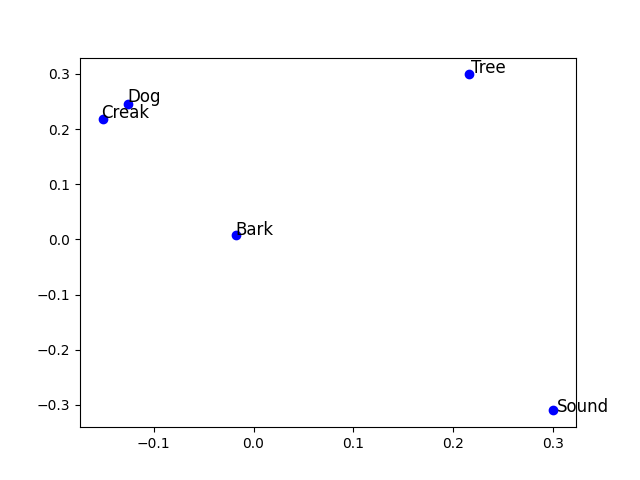

In [4]:
import matplotlib.pyplot as plt
for word in vocab:
  v = model.wv[word]
  x = v[0]
  y = v[1]
  plt.plot(x, y, 'bo')
  plt.text(x * (1 + 0.01), y * (1 + 0.01) , word, fontsize=12)

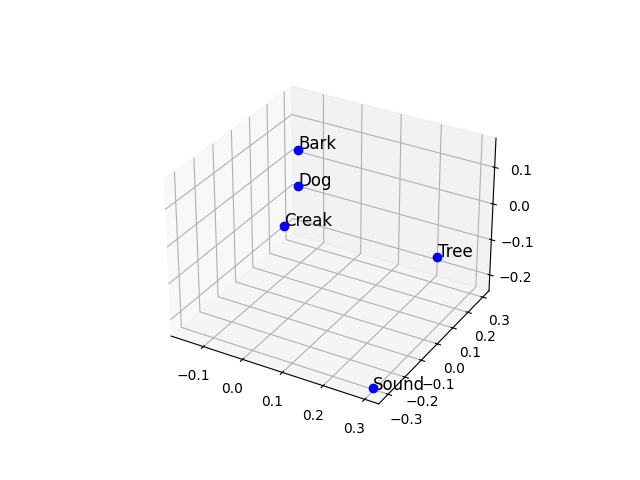

In [5]:
fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining axes
for word in vocab:
  v = model.wv[word]
  x = v[0]
  y = v[1]
  z = v[2]
  ax.plot(x, y, z, 'bo')
  ax.text(x * (1 + 0.01), y * (1 + 0.01) , z * (1 + 0.01) , word, fontsize=12, zorder=1)


# syntax for plotting
plt.show()

bark has very small magnitude because it is the least discriminating.

sound has the most different vector as it is the most discriminating

dog and tree have similar vectors even though they don't co-occur, is this interference? i think so

In [7]:
v = model.wv["Tree"]  + model.wv["Sound"]
print(v)

# Find the most similar word(s) to your vector
similar_words = model.wv.most_similar(positive=[v], topn=5)
print(similar_words)

[ 0.51560485 -0.01099873 -0.40440792]
[('Sound', 0.7874076962471008), ('Tree', 0.6610782742500305), ('Creak', -0.07284495234489441), ('Dog', -0.2538038194179535), ('Bark', -0.6959331631660461)]


In [7]:
import gensim.downloader as api

model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [8]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [9]:
model.most_similar(positive=['woman'], negative=['man'])

[('she', 0.45412716269493103),
 ('her', 0.39712801575660706),
 ('Certified_Nurse_Midwife', 0.3824717402458191),
 ('Ms.', 0.37514764070510864),
 ('silicone_gel_implant', 0.3704040050506592),
 ('girlhood', 0.37001779675483704),
 ('nurse_midwife', 0.369699090719223),
 ('undergo_hysterectomy', 0.36893028020858765),
 ('silicone_breast_implants', 0.3683786392211914),
 ('breastfeeds', 0.36699435114860535)]

In [10]:
model.most_similar(positive=['man'], negative=['woman'])

[('Shaun_Maloney_Aiden_McGeady', 0.35027220845222473),
 ('tactically_adept', 0.3487197160720825),
 ('Matt_Bramald', 0.3400961458683014),
 ('strongside_LB', 0.337636798620224),
 ('newboy', 0.33329278230667114),
 ('Philip_Boampong', 0.33152341842651367),
 ('joker', 0.3312978446483612),
 ('superpest', 0.3302587866783142),
 ('TRENDING_UP', 0.3300756514072418),
 ('Felipe_Claybrooks', 0.3289523720741272)]

In [11]:
model.most_similar(positive=['woman'], negative=['potato'])

[('teenage_girl', 0.4875861406326294),
 ('man', 0.4801003038883209),
 ('girl', 0.47059670090675354),
 ('boyfriend', 0.39538267254829407),
 ('teenager', 0.3934967815876007),
 ('Latoyia_Figueroa', 0.39079350233078003),
 ('girlfriend', 0.38970452547073364),
 ('sexually_assaulted', 0.38897788524627686),
 ('mother', 0.3844716548919678),
 ('policewoman', 0.3821815848350525)]

In [12]:
model.most_similar(positive=['man'], negative=['potato'])

[('woman', 0.512745201587677),
 ('teenager', 0.42085593938827515),
 ('boy', 0.41502395272254944),
 ('teenage_girl', 0.40686455368995667),
 ('suspected_purse_snatcher', 0.38468220829963684),
 ('men', 0.37045347690582275),
 ('girlfriend', 0.3650696873664856),
 ('teen_ager', 0.36436158418655396),
 ('robber', 0.3615001440048218),
 ('girl', 0.36067575216293335)]

In [13]:
model = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [14]:
model.most_similar(positive=['woman'], negative=['potato'])

[('custody', 0.6453642249107361),
 ('teenager', 0.5869944095611572),
 ('victim', 0.5808117985725403),
 ('girlfriend', 0.5771085023880005),
 ('assaulting', 0.5764784216880798),
 ('innocence', 0.575715184211731),
 ('asylum', 0.5743803381919861),
 ('defendant', 0.5713961720466614),
 ('ager', 0.566578209400177),
 ('assaulted', 0.5652875900268555)]

In [15]:
model.most_similar(positive=['woman'])

[('girl', 0.9065280556678772),
 ('man', 0.8860336542129517),
 ('mother', 0.8763704299926758),
 ('her', 0.8613135814666748),
 ('boy', 0.859611988067627),
 ('she', 0.8430695533752441),
 ('herself', 0.8224568367004395),
 ('child', 0.8108214139938354),
 ('wife', 0.8037394285202026),
 ('old', 0.7982394695281982)]

In [16]:
model.most_similar(positive=['car'], negative=['cat'])

[('dealerships', 0.5889867544174194),
 ('cars', 0.585689127445221),
 ('dealership', 0.5844133496284485),
 ('mercedes', 0.5769475102424622),
 ('vehicles', 0.5683990716934204),
 ('derailed', 0.5628634691238403),
 ('belgrade', 0.5615587830543518),
 ('truck', 0.5414535403251648),
 ('auto', 0.5409232378005981),
 ('trucks', 0.5376284718513489)]

In [17]:
model.most_similar(positive=['car'])

[('truck', 0.92085862159729),
 ('cars', 0.8870189785957336),
 ('vehicle', 0.8833683729171753),
 ('driver', 0.8464019298553467),
 ('driving', 0.8384189009666443),
 ('bus', 0.8210511803627014),
 ('vehicles', 0.8174992799758911),
 ('parked', 0.7902189493179321),
 ('motorcycle', 0.7866503000259399),
 ('taxi', 0.7833929657936096)]

In [18]:
model.most_similar(positive=['potato'])

[('potatoes', 0.8643379807472229),
 ('soup', 0.8489008545875549),
 ('tomato', 0.8262098431587219),
 ('pumpkin', 0.8209983110427856),
 ('mashed', 0.81805419921875),
 ('baked', 0.8178972005844116),
 ('peanut', 0.815437912940979),
 ('bread', 0.8093469738960266),
 ('beet', 0.805566668510437),
 ('cabbage', 0.8037008047103882)]

In [19]:
model.most_similar(positive=['driver'])

[('car', 0.8464018702507019),
 ('drivers', 0.8261804580688477),
 ('driving', 0.8175700306892395),
 ('truck', 0.7747675776481628),
 ('taxi', 0.773446261882782),
 ('vehicle', 0.7583039402961731),
 ('cab', 0.7432880401611328),
 ('mechanic', 0.7254164814949036),
 ('motorbike', 0.7238834500312805),
 ('bicycle', 0.7164469957351685)]

In [20]:
model.most_similar(positive=['car'], negative=['potato'])

[('driver', 0.6377899050712585),
 ('vehicle', 0.6268190145492554),
 ('taxi', 0.6076930165290833),
 ('cab', 0.6022234559059143),
 ('passenger', 0.5989752411842346),
 ('bus', 0.5904064178466797),
 ('mercedes', 0.5814342498779297),
 ('drivers', 0.579323410987854),
 ('cars', 0.5771004557609558),
 ('parked', 0.5694197416305542)]

for topics to be interfering, they have to be unrelated and non-co-occurring but close in vector space. Is this even possible given how embeddings work?



when I asked dad the difference between a car and a potato, he proceded to list certain differences such as not living, natural/unnatural, made out of components,

I suppose more what the difference is, is not the difference between their concepts, but the difference in how they occur in text - these things are related but not the same.

rearranging the equation may help understand.



In [8]:
from gensim.models import Word2Vec

# Example corpus (list of sentences)
corpus = [
    ["Dog", "Bark"],
    ["Tree", "Bark"],
    ["Dog","Sound", "Bark"],
    ["Tree", "Sound", "Creak"]
    # ... add more sentences
]

# Train Word2Vec model
model = Word2Vec(corpus, vector_size=3, window=5, min_count=1, sg=1)

(<gensim.models.word2vec.Word2Vec at 0x22e670f1460>,
 array(['Burger', 'Cat', 'Chips', 'Dinner', 'Dog', 'Fish', 'Pet', 'Rabbit',
        'and'], dtype='<U6'))

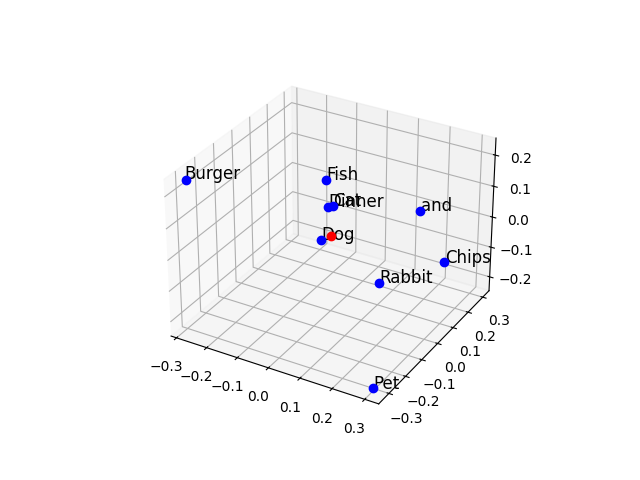

In [14]:
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

def train_model(corpus, dimensions):
  # Train Word2Vec model
  model = Word2Vec(corpus, vector_size=dimensions, window=5, min_count=1, sg=1)
  return model

def corpus_vocab(corpus):
  return np.unique([word for sublist in corpus for word in sublist])

def getCoords(vocab, model):
  xs = []
  ys = []

  for word in vocab:
    v = model.wv[word]
    xs.append(v[0])
    ys.append(0)
  return xs, ys

def plot(vocab, model, dimensions):
  fig = plt.figure()
  if dimensions>=3:
    ax = plt.axes(projection ='3d')
    #plot origin
    ax.plot(0, 0, 0, 'ro')


  for i, word in enumerate(vocab):
    v = model.wv[word]
    x = v[0]
    y = 0
    z = 0
    if dimensions>=2:
      y = v[1]
    if dimensions>=3:
      z= v[2]

    if dimensions <=2:
      plt.plot(x, y, 'bo')
      plt.text(x * (1 + 0.01), y * (1 + 0.01) , word, fontsize=12)
      plt.axhline()
      plt.axvline()

    elif dimensions >=3:
      # syntax for 3-D projection
      ax.plot(x, y, z, 'bo')
      ax.text(x * (1 + 0.01), y * (1 + 0.01) , z * (1 + 0.01) , word, fontsize=12, zorder=1)

def all(corpus, dimensions):
  vocab = corpus_vocab(corpus)
  model = train_model(corpus, dimensions)
  plot(vocab, model, dimensions)
  return model, vocab


corpus = [
    ["Dog"],
    ["Cat"],
    ["Rabbit"],
    ["Fish"],
    ["Dog", "Fish"],
    ["Cat", "Fish"],
    ["Cat", "and", "Dog"],
    ["Chips"],
    ["Fish", "and", "Chips"],
    ["Burger"],
    ["Burger", "and", "Chips"],
    ["Burger", "Dinner"],
    ["Fish", "Dinner"],
    ["Chips", "Dinner"],
    ["Rabbit", "Pet"],
    ["Fish", "Pet"],
    ["Cat", "Pet"],
    ["Dog", "Pet"]
]


#all(corpus, 1)
all(corpus, 3)

len vocab:  6


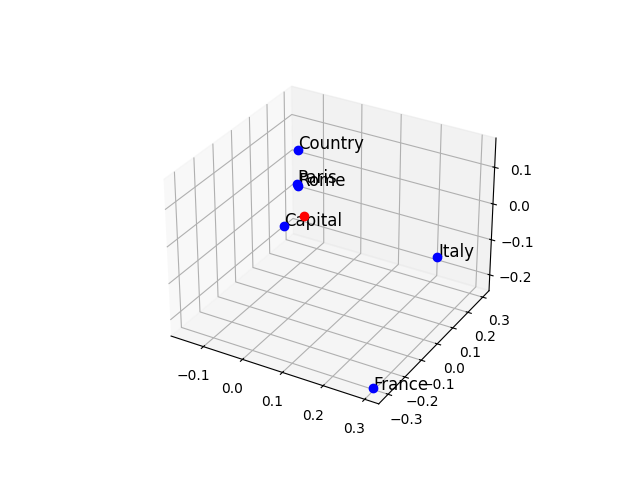

In [15]:
corpus = [
    ["Paris", "Capital"],
    ["Rome", "Capital"],
    ["Rome", "Italy"],
    ["Paris", "France"],
    ["Italy", "Country"],
    ["France", "Country"]
]

'''
    ["England", "Country"],
    ["London", "England"],
    ["London", "Capital"],
    ["Cardiff", "Wales"],
    ["Wales", "Country"],
    ["Cardiff", "Capital"],
    ["Madrid", "Spain"],
    ["Madrid", "Capital"],
    ["Spain", "Country"],
    ["Edinburgh", "Scotland"],
    ["Scotland", "Country"],
    ["Edinburgh", "Capital"],
    ["Greece", "Athens"],
    ["Athens", "Capital"],
    ["Greece", "Country"]
'''

#all(corpus, 1)
model, vocab = all(corpus, 3)
print("len vocab: ", len(vocab))

Vector arithmetic

In [24]:
def printInteresting(model):
  print("Vector Arithmetic")
  print(model.wv.most_similar(positive=["london"], negative=["england"]))
  #print(model.wv.most_similar(positive=["Athens"], negative=["Greece"]))
  print(model.wv.most_similar(positive=["rome"], negative=["italy"]))
  #print(model.wv.most_similar(positive=["Edinburgh"], negative=["Scotland"]))
  #print(model.wv.most_similar(positive=["Cardiff"], negative=["Wales"]))
  print("\nVector Similarities")
  print(model.wv.cosine_similarities(model.wv["italy"], [model.wv["rome"], model.wv["paris"] ]))
  print(model.wv.cosine_similarities(model.wv["france"], [model.wv["rome"], model.wv["paris"] ]))

printInteresting(model)

Vector Arithmetic


KeyError: "Key 'london' not present in vocabulary"

Vector similarities

In [ ]:
print(model.wv.cosine_similarities(model.wv["Italy"], [model.wv["Rome"], model.wv["Paris"] ]))
print(model.wv.cosine_similarities(model.wv["France"], [model.wv["Rome"], model.wv["Paris"] ]))

The cosine similarity ranges from -1 to 1:
1: Indicates identical vectors (perfect similarity).
0: Implies no similarity (orthogonal vectors).
-1: Represents opposite vectors (maximum dissimilarity).

In [ ]:
model.wv.most_similar(positive=["Capital", "Italy"])

In [16]:
import nltk
nltk.download('brown')


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\danca\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

In [19]:
from nltk.corpus import brown

#brown.raw()
print(len(brown.sents()))
corpus = brown.sents()[:100]



57340


len vocab:  860


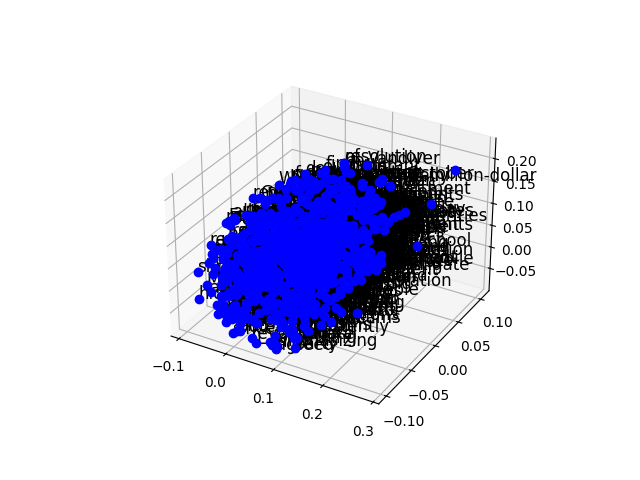

In [20]:
brown_model, vocab = all(corpus, 10)
model = brown_model
print("len vocab: ", len(vocab))

In [ ]:
print(model.wv.most_similar(positive=["London"], negative=["England"]))
print(model.wv.most_similar(positive=["Paris"], negative=["France"]))
print(model.wv.most_similar(positive=["London", "France"], negative=["England"]))
print(model.wv.most_similar(positive=["Paris", "England"], negative=["France"]))

In [ ]:
import gensim.downloader as api

#model = api.load('word2vec-google-news-300')

#50 dimensions
glove_model = api.load("glove-wiki-gigaword-50")
model = glove_model

In [ ]:
print(model.most_similar(positive=["london"], negative=["england"]))
print(model.most_similar(positive=["paris"], negative=["france"]))
print(model.most_similar(positive=["london", "france"], negative=["england"]))
print(model.most_similar(positive=["paris", "england"], negative=["france"]))
print(model.most_similar(positive=["rome", "france"], negative=["italy"]))

In [ ]:
  print("Vector Arithmetic")
  print(model.most_similar(positive=["man"], negative=["woman"]))
  #print(model.wv.most_similar(positive=["Athens"], negative=["Greece"]))
  print(model.most_similar(positive=["rome"], negative=["italy"]))
  #print(model.wv.most_similar(positive=["Edinburgh"], negative=["Scotland"]))
  #print(model.wv.most_similar(positive=["Cardiff"], negative=["Wales"]))
  print("\nVector Similarities")
  print(model.wv.cosine_similarities(model["Italy"], [model["Rome"], model["Paris"] ]))
  print(model.wv.cosine_similarities(model["France"], [model["Rome"], model["Paris"] ]))

In [ ]:
printInteresting(model)

In [ ]:
corpus[0]